## mehmetfatihdata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')


In [2]:
titanic=pd.read_csv('dataset/titanic.csv')
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
X = titanic [['PassengerId', 'Pclass', 'SibSp',
       'Parch', 'Fare']]
y = titanic['Survived']

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [7]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [8]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.69
Modelin test verisindeki doğruluğu   : 0.69


In [10]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.69
Modelin test verisindeki doğruluğu   : 0.69


In [11]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.660112,0.715084
1,0.010,0.678371,0.692737
2,0.100,0.686798,0.698324
3,1.000,0.686798,0.687151
4,10.000,0.685393,0.687151
5,100.000,0.685393,0.687151
6,1000.000,0.685393,0.687151


### Let's add new variables to the model we created

In [12]:
titanic.Survived.unique()

array([0, 1], dtype=int64)

In [13]:
titanic["sex"]=titanic.Sex.replace({'female':1,'male':0})
titanic=titanic.drop(columns='Sex',axis=0)

In [14]:
titanic.isnull().sum()/len(titanic)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
sex            0.000000
dtype: float64

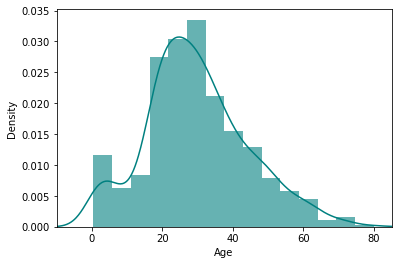

In [15]:
ax = titanic["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [16]:
titanic['Age_mean']=titanic['Age']
titanic['Age_inter']=titanic['Age']

In [17]:
titanic['Age_inter'] = titanic.groupby("sex")['Age'].transform(lambda x: x.interpolate())
titanic['Age_inter'].isnull().sum()/len(titanic)

0.0

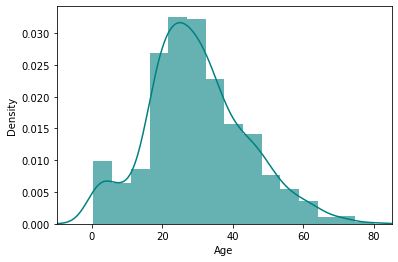

In [18]:
ax = titanic['Age_inter'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic['Age_inter'].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [19]:
titanic['Age_mean'] = titanic.groupby("sex")['Age'].transform(lambda x: x.fillna(x.mean()))
titanic['Age_mean'].isnull().sum()/len(titanic)

0.0

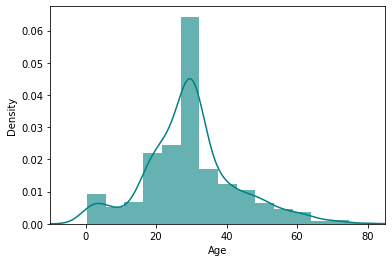

In [20]:
ax = titanic['Age_mean'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic['Age_mean'].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

A FILLING THE 'AGE' VARIABLE WITH INTERPOLATE WILL BE THE BEST SOLUTION.

In [21]:
titanic['Age']=titanic['Age_inter']
X = titanic [['PassengerId', 'Pclass', 'SibSp','Age', 'sex',
       'Parch', 'Fare']]
y = titanic['Survived']

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [23]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [24]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [31]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [27]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.693820,0.653631
1,0.010,0.731742,0.709497
2,0.100,0.800562,0.782123
3,1.000,0.799157,0.776536
4,10.000,0.801966,0.770950
5,100.000,0.800562,0.770950
6,1000.000,0.797753,0.776536


When we look at the results, we see that 80% and 78% correct classification is made when using educational data, and 80% and 78% when using test data. We can say that both methods gave close results.

When we look at the accuracy values, we see that the most suitable c value for our dataset is 1, which is also the default value.

In [36]:
tahmin_değerleri = np.array()
print(log_reg.predict(tahmin_değerleri))

TypeError: array() missing required argument 'object' (pos 1)

END.